### Weather API Challenge

In [1]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [4]:
# print(cities)

In [5]:
# Set up query url with API key
url = "http://api.openweathermap.org/data/2.5/forecast?"
units = "Imperial"

query_url = f'{url}appid={api_key}&units={units}'

# response = requests.get(f"{query_url}&q={city}").json()

# Create list to append data later
weather_data = []

In [6]:
# # Test data retrieval with one city. Find:
#     name
#     countries
#     latitude
#     longitude
#     humidity
#     temperature
#     wind
#     clouds
    
# Test response
response1 = requests.get(f'{query_url}&q=Esperance').json()

# Confirm Keys
response1.keys()

# Print main keys to use
temp = response1['list']
city_list = response1['city']

# Call test variables
test_name = response1['city']['name']
test_country = response1['city']['country']
test_lat = response1['city']['coord']['lat']
test_lng = response1['city']['coord']['lon']
test_temp = temp[0]['main']['temp_max']
test_humidity = temp[0]['main']['humidity']
test_wind = temp[0]['wind']['speed']
test_clouds = temp[0]['clouds']['all']

# Run test
print(test_name)
print(test_country)
print(test_lat)
print(test_lng)
print(test_temp)
print(test_humidity)
print(test_wind)
print(test_clouds)

Esperance
AU
-33.8583
121.8932
59.9
69
27.96
11


In [7]:
#API Call
print(f'Beginning Data Retrieval \n-----------------------------')
records = 0

for city in cities:
    
    try:

        response = requests.get(f"{query_url}&q={city}").json()
        list_var = response['list']
        
        city_name = response['city']['name']
        country_name = response['city']['country']
        lat = response['city']['coord']['lat']
        lng = response['city']['coord']['lon']
        max_temp = list_var[0]['main']['temp_max']
        humidity = list_var[0]['main']['humidity']
        wind = list_var[0]['wind']['speed']
        clouds = list_var[0]['clouds']['all']
        
        weather_data.append({
            "City": city_name,
            "Country": country_name,
            "Lat": lat,
            "Lng": lng,
            "Cloudiness": clouds,
            "Humidity": humidity,
            "Max Temp": max_temp,
            "Wind Speed": wind})
        
        print(f'Processing Record {records} | {city_name}')
        
        records = records + 1
        
        #Prevents API getting blocked
        time.sleep(1.01)
                
    except:
        print("City not found. Skipping...")
    continue
    
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 0 | Luderitz
Processing Record 1 | Hobart
Processing Record 2 | Ushuaia
Processing Record 3 | Vardo
Processing Record 4 | Longjiang
Processing Record 5 | Bambous Virieux
Processing Record 6 | Albany
Processing Record 7 | Hithadhoo
Processing Record 8 | Cockburn Town
Processing Record 9 | Pisco
City not found. Skipping...
Processing Record 10 | Tiksi
Processing Record 11 | Lavrentiya
Processing Record 12 | Mossoro
Processing Record 13 | Chuy
Processing Record 14 | Upernavik
Processing Record 15 | Rikitea
Processing Record 16 | Saskylakh
Processing Record 17 | Dingle
Processing Record 18 | Busselton
Processing Record 19 | New Norfolk
Processing Record 20 | North Bend
Processing Record 21 | Georgetown
Processing Record 22 | Kushiro
Processing Record 23 | Chifeng
Processing Record 24 | Saint George
Processing Record 25 | Nome
Processing Record 26 | Moratuwa
Processing Record 27 | Thompson
Processing Record 28 | Butar

Processing Record 223 | Kibakwe
Processing Record 224 | Kalianget
Processing Record 225 | Srednekolymsk
Processing Record 226 | Kavieng
Processing Record 227 | Sovetskiy
Processing Record 228 | Iqaluit
Processing Record 229 | Nioro
City not found. Skipping...
Processing Record 230 | Beruwala
Processing Record 231 | Broome
Processing Record 232 | Nishihara
Processing Record 233 | Raudeberg
Processing Record 234 | Baruun-Urt
Processing Record 235 | Saquena
Processing Record 236 | Sechura
Processing Record 237 | Cumberland
Processing Record 238 | Shahr-e Babak
Processing Record 239 | Darnah
Processing Record 240 | Hami
Processing Record 241 | Demirci
Processing Record 242 | Nova Vicosa
Processing Record 243 | Kota Kinabalu
Processing Record 244 | Faanui
Processing Record 245 | Pokhara
Processing Record 246 | Panzhihua
Processing Record 247 | Iskilip
Processing Record 248 | Le Port
Processing Record 249 | Kingsland
Processing Record 250 | Longyearbyen
Processing Record 251 | Olinda
Process

Processing Record 449 | Aktau
Processing Record 450 | Hobyo
Processing Record 451 | Bagdarin
Processing Record 452 | San Angelo
Processing Record 453 | Coihaique
Processing Record 454 | Yatou
Processing Record 455 | Puri
Processing Record 456 | Altus
Processing Record 457 | Neuquen
Processing Record 458 | Daitari
City not found. Skipping...
Processing Record 459 | Grand-Santi
Processing Record 460 | Ust-Kuyga
Processing Record 461 | Mairana
Processing Record 462 | Port Shepstone
Processing Record 463 | Tulare
Processing Record 464 | Pacific Grove
Processing Record 465 | Goderich
City not found. Skipping...
Processing Record 466 | Mollendo
Processing Record 467 | Rapid Valley
Processing Record 468 | Rome
City not found. Skipping...
Processing Record 469 | Lompoc
Processing Record 470 | Shimoda
Processing Record 471 | Sobolevo
Processing Record 472 | Werda
Processing Record 473 | Atbasar
Processing Record 474 | Awjilah
Processing Record 475 | Alta Floresta
City not found. Skipping...
Cit

In [8]:
weather_py = pd.DataFrame(weather_data)
weather_py.head()

,City,Country,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Luderitz,NA,-26.6481,15.1594,32,70,61.05,5.01
1,Hobart,AU,-42.8826,147.3281,100,52,65.08,16.96
2,Ushuaia,AR,-54.8070,-68.3074,100,83,53.42,3.42
3,Vardo,US,39.6165,-77.7392,0,49,66.31,5.28
4,Longjiang,CN,47.3301,123.1838,100,98,31.78,13.18


In [9]:
weather_py.count()

City          548
Country       548
Lat           548
Lng           548
Cloudiness    548
Humidity      548
Max Temp      548
Wind Speed    548
dtype: int64

In [10]:
#Save to CSV
weather_py.to_csv("weather_data.csv")

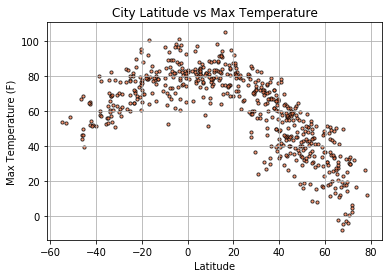

In [11]:
#Latitude vs. Temperature Plot
plt.scatter(weather_py["Lat"], weather_py["Max Temp"], s=10, marker='o', color='Coral', edgecolor='Black', alpha=0.75)
plt.title(f'City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("../LatvTemp.png", bbox_inches='tight')
plt.show()

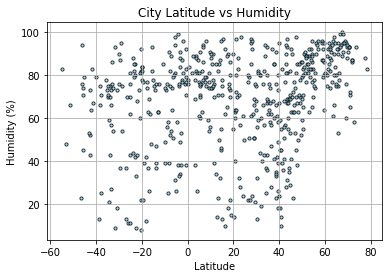

In [12]:
#Latitude vs. Humidity Plot
plt.scatter(weather_py["Lat"], weather_py["Humidity"], s=10, marker='o', color='Skyblue', edgecolor='Black', alpha=0.75)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("../LatvHum.png", bbox_inches='tight')
plt.show()

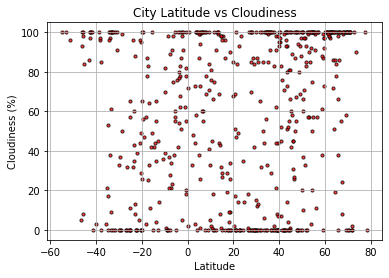

In [13]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_py["Lat"], weather_py["Cloudiness"], s=10, marker='o', color='red', edgecolor='black', alpha=0.75)
plt.title(f'City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("../LatvClouds.png", bbox_inches='tight')
plt.show()               

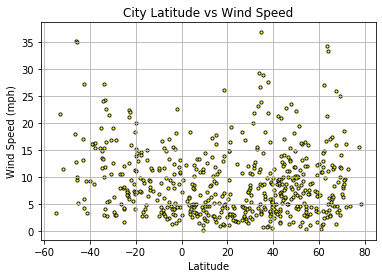

In [14]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_py['Lat'], weather_py['Wind Speed'], s=10, marker='o', color='yellow', edgecolor='black', alpha=0.85)
plt.title(f'City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("../LatvWind.png", bbox_inches='tight')
plt.show()